In [ ]:
import eeweather as ee
import json
import datetime
import pytz
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#http://eeweather.openee.io/en/latest/basics.html
#https://github.com/openeemeter/eeweather/blob/master/scripts/tutorial.ipynb

In [ ]:
zip_code = '92602'

In [ ]:
lat, lng = ee.zcta_to_lat_long(zip_code)
lat, lng

In [ ]:
# Produces a list of stations that are close to the zip code of choice. 
# This is a Pandas dataframe that can be indexed worked with as a normal Pandas object.
# The distances are based on the Euclidean distance (i.e., as the crow flies) between the given (lat, lng) of the project 
# and the given station. 

ranked_stations = ee.rank_stations(lat, lng)
ranked_stations.head(15)

In [ ]:
ranked_stations['ca_climate_zone'].unique().tolist()

In [ ]:
#Traversing the Pandas dataframe.

ranked_stations.iloc[0]

In [ ]:
#Use boolean indexing to sift through a dataframe.  
#You can filter to find high quality stations. 

ranked_stations[ranked_stations['rough_quality'] == 'high'].head(10)

In [ ]:
# Only finds stations that are are California if the cz2010.
#Returns the best station for the given zipcode.

lat, lng = ee.zcta_to_lat_long('91755')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True) #You can further filter the stations using positional arguments. 
station, error = ee.select_station(ranked_stations)
station

In [ ]:
#Station is a json object that can be traversed as normal.

station.json()

In [ ]:
station.json()['climate_zones']['iecc_moisture_regime']

In [ ]:
ee.plot_station_mapping(lat, lng, station, distance_meters=5000)

In [ ]:
ee.rank_stations()

In [ ]:
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)

In [ ]:
temp_c = station.load_cz2010_hourly_temp_data(start_date, end_date)
temp_f = temp_c * 1.8 + 32 

In [ ]:
usc_df = temp_f.to_frame(name='temp_f')
usc_df.head(10)

In [ ]:
#Send hourly data from dataframe to a CSV file. 

usc_df.to_csv('t2017_eeweather_91755_cz2010.csv', sep=',', encoding='utf-8')

In [ ]:
import eeweather as ee
import json
import datetime
import pytz
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
lat, lng = ee.zcta_to_lat_long('92602')
lat, lng

In [ ]:
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
station

In [ ]:
station.json()['name']

In [ ]:
start_date = datetime.datetime(2018, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2018, 12, 31, tzinfo=pytz.UTC)

In [ ]:
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2018 " + station.json()['name'])
plt.show()

In [ ]:
irvine_18_df = temp_F.to_frame(name='temp_F').head(10)
irvine_18_df

In [ ]:
lat, lng = ee.zcta_to_lat_long('91755')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [ ]:
usc_df = temp_F.to_frame(name='temp_F').head(10)
usc_df

In [ ]:
lat, lng = ee.zcta_to_lat_long('92602')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [ ]:
irvine_df = temp_F.to_frame(name='temp_F').head(10)
irvine_df

In [ ]:
lat, lng = ee.zcta_to_lat_long('91744')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [ ]:
fullerton_df = temp_F.to_frame(name='temp_F').head(10)
fullerton_df

In [ ]:
lat, lng = ee.zcta_to_lat_long('93101')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [ ]:
sb_df = temp_F.to_frame(name='temp_F').head(10)
sb_df

In [ ]:
lat, lng = ee.zcta_to_lat_long('96001')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [ ]:
redding_df = temp_F.to_frame(name='temp_F').head(10)
redding_df

In [ ]:
lat, lng = ee.zcta_to_lat_long('95531')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)
temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 
ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [ ]:
cc_df = temp_F.to_frame(name='temp_F').head(10)
cc_df

In [ ]:
lat, lng = ee.zcta_to_lat_long('90046')
ranked_stations = ee.rank_stations(lat, lng, is_cz2010=True)
station, error = ee.select_station(ranked_stations)

start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)

temp_C = station.load_isd_daily_temp_data(start_date, end_date)
temp_F = temp_C * 1.8 + 32 

ax = temp_F.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month')
ax.set_title("2017 " + station.json()['name'])
plt.show()

In [ ]:
glendale_data = temp_F.to_frame(name='temp_f')

In [ ]:
glendale_data.to_csv('burbank.csv')

In [5]:
#http://eeweather.openee.io/en/latest/basics.html
#https://github.com/openeemeter/eeweather/blob/master/scripts/tutorial.ipynb

import eeweather as ee
import json
import datetime
import pytz
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
lat, lng = ee.zcta_to_lat_long('90046') #Converts the zip code to a geocode that is then used to request the data. 

ranked_stations = ee.rank_stations(lat, lng, 
                                   is_cz2010=True,
                                   match_iecc_climate_zone=True,
                                   match_iecc_moisture_regime=True,
                                   match_ba_climate_zone=True,
                                   match_ca_climate_zone=True,
                                   minimum_quality='high') #Question for Phil: How is this determined without knowing the start and end date?

station, error = ee.select_station(ranked_stations)

In [9]:
ranked_stations.head()

,rank,distance_meters,latitude,longitude,iecc_climate_zone,iecc_moisture_regime,ba_climate_zone,ca_climate_zone,rough_quality,elevation,state,tmy3_class,is_tmy3,is_cz2010,difference_elevation_meters
usaf_id,,,,,,,,,,,,,,,
722880,1,10397.039486,34.201,-118.358,3,B,Hot-Dry,CA_09,high,236.2,CA,II,True,True,None
722886,2,16109.411055,34.210,-118.489,3,B,Hot-Dry,CA_09,high,234.7,CA,II,True,True,None


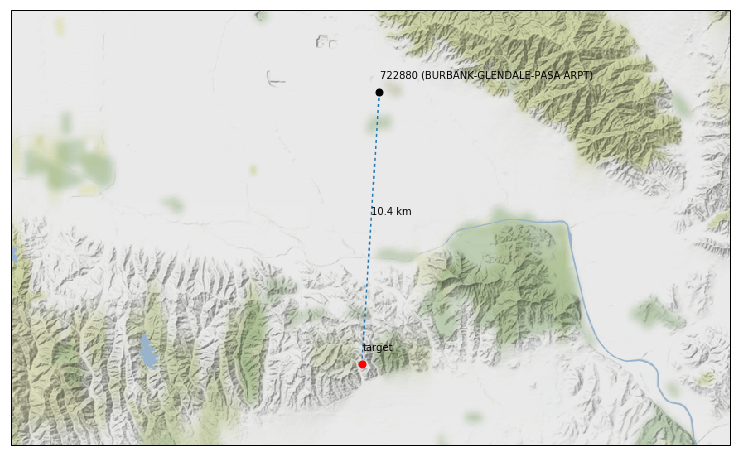

In [10]:
#Display an area map of the station and the project. Question for Phil: What does the distance_meters parameter do?
ee.plot_station_mapping(lat, lng, station, 
                        distance_meters=10397.03)

In [11]:
#ISD Station ID.
station

ISDStation('722880')

In [13]:
get_cz2010_station_metadata('722880')

NameError: name 'get_cz2010_station_metadata' is not defined

In [6]:
#Display contents of the station object (as a json)
print(json.dumps(station.json(), indent=2))

{
  "elevation": 236.2,
  "latitude": 34.201,
  "longitude": -118.358,
  "icao_code": "KBUR",
  "name": "BURBANK-GLENDALE-PASA ARPT",
  "quality": "high",
  "wban_ids": [
    "23152",
    "99999"
  ],
  "recent_wban_id": "23152",
  "climate_zones": {
    "iecc_climate_zone": "3",
    "iecc_moisture_regime": "B",
    "ba_climate_zone": "Hot-Dry",
    "ca_climate_zone": "CA_09"
  }
}


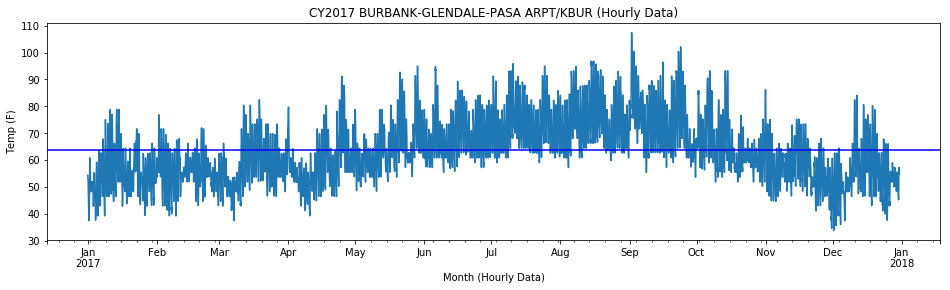

In [7]:
#Retrieve hourly temperature data from the selected station.
start_date = datetime.datetime(2017, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2017, 12, 31, tzinfo=pytz.UTC)

temp_C_hourly = station.load_cz2010_hourly_temp_data(start_date, 
                                                     end_date)
temp_F_hourly = temp_C_hourly * 1.8 + 32 

ax = temp_F_hourly.plot(figsize=(16,4))
ax.set_ylabel('Temp (F)')
ax.set_xlabel('Month (Hourly Data)')
ax.set_title("CY2017 " + station.json()['name'] + '/' + station.json()['icao_code'] + ' (Hourly Data)')
plt.axhline(y=63.55, color='b', linestyle='-')
plt.show()

In [8]:
#Convert the pandas series to a dataframe and display a sample of the entire dataset.
#Temperature value are displayed in degrees fahrenheit.
glendale_hr_temp_f = temp_F_hourly.to_frame(name='temp_f')
glendale_hr_temp_f.sample(frac=0.001)

,temp_f
2017-03-21 22:00:00+00:00,73.40
2017-04-17 02:00:00+00:00,71.42
2017-09-13 02:00:00+00:00,82.22
2017-06-24 12:00:00+00:00,60.80
2017-07-11 01:00:00+00:00,83.12
2017-06-09 02:00:00+00:00,69.44
2017-07-23 17:00:00+00:00,76.10
2017-08-17 11:00:00+00:00,69.62
2017-03-22 17:00:00+00:00,64.76


In [9]:
glendale_hr_temp_f['temp_f'].mean()

63.55927206134806

In [10]:
#Determine number of points in the data set. 2017 was not a leap year and so there are a total of 8,760 hours in the year. 
print('The dataset contains: {} hourly data points.'.format(glendale_hr_temp_f.shape[0]))
print('There are a total of {} hourly data points that are missing from the dataset.'.format(8760-glendale_hr_temp_f.shape[0]))

The dataset contains: 8737 hourly data points.
There are a total of 23 hourly data points that are missing from the dataset.


In [11]:
#Export dataframe to CSV file. 
glendale_hr_temp_f.to_csv('export/glendale_hourly.csv')